**Importation des librairies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

**Chargement du dataset**

In [6]:
digits =  datasets.load_digits()
X = digits.data
y = digits.target

**Réductio de dimensions**

In [7]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

**Entrainement du modèle**

In [9]:
n_clusters = 10
kmeans  = KMeans(n_clusters = n_clusters, random_state = 42)
y_pred = kmeans.fit_predict(X)

**Visualisation des clusters**

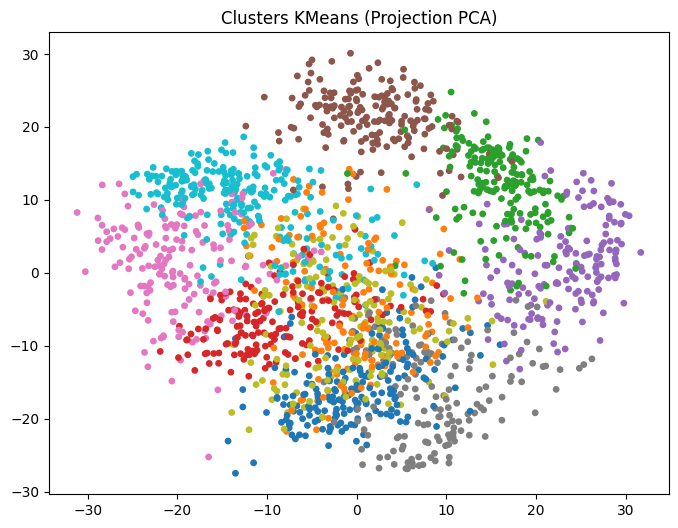

In [11]:
plt.figure(figsize = (8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_pred, cmap = "tab10", s = 15)
plt.title("Clusters KMeans (Projection PCA)")
plt.show()

**Evaluation**

In [12]:
print("Accuracy Score : \n", accuracy_score(y, y_pred))
cm = confusion_matrix(y, y_pred)
print("Matrice de confusion :\n", cm)

Accuracy Score : 
 0.25431274346132443
Matrice de confusion :
 [[  0   0   0   0   2 176   0   0   0   0]
 [  0   1   2  23   0   0   1 130   3  22]
 [  2   0   0 146   0   1  12   6   9   1]
 [  7   2   0   1   0   0 159   0   6   8]
 [  5   0   0   0 159   0   0  13   4   0]
 [  0 137   2   0   2   0   0   0   0  41]
 [  0   0 176   0   0   1   0   3   1   0]
 [169   0   0   0   0   0   0   0  10   0]
 [  2   2   1   3   0   0   0  14 136  16]
 [  8   4   0   0   3   0   1   1   3 160]]


**Affichage de quelques images**

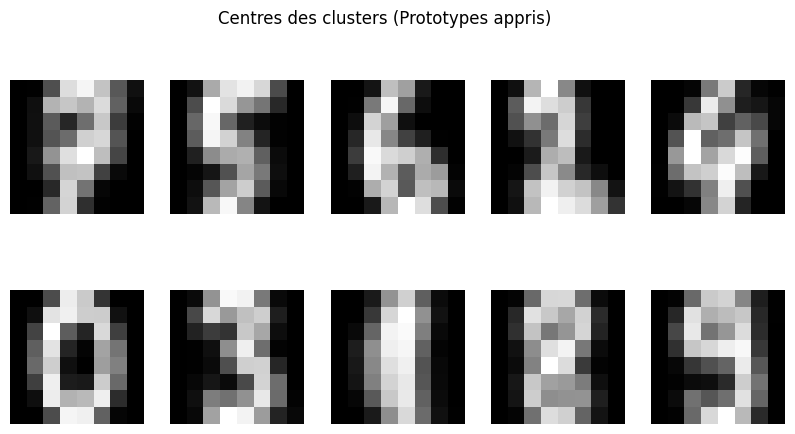

In [15]:
fig, axes = plt.subplots(2, 5, figsize = (10, 5))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for ax, center in zip(axes.ravel(), centers):
    ax.imshow(center, cmap = "gray")
    ax.axis("off")

plt.suptitle("Centres des clusters (Prototypes appris)")
plt.show()